 CONSTRUCTION D'UN MODELE DE MACHINE LEARNING           

      1.Importation des librairies et du dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#obtenir les jeu de données présent dans seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
df=df.drop(['alive','class','who','embarked','deck'] , axis=1)

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,True,Cherbourg,True


-   Détection de doublons

In [7]:
df.duplicated().sum()

111

In [8]:
#Dédoublonner le jeu de données

df=df.drop_duplicates()

In [9]:
df.shape

(780, 10)

-  Gestion de la coherence des modalités des variables qualitatives

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     780 non-null    int64  
 1   pclass       780 non-null    int64  
 2   sex          780 non-null    object 
 3   age          676 non-null    float64
 4   sibsp        780 non-null    int64  
 5   parch        780 non-null    int64  
 6   fare         780 non-null    float64
 7   adult_male   780 non-null    bool   
 8   embark_town  778 non-null    object 
 9   alone        780 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 56.4+ KB


In [11]:
#verification du nombre de modalités par variable
for key,value in df.iteritems():
    print("{}: {}".format(key,len(df[key].unique())))

survived: 2
pclass: 3
sex: 2
age: 89
sibsp: 7
parch: 7
fare: 248
adult_male: 2
embark_town: 4
alone: 2


In [12]:
# Vérification de la cohérence interne des modalités

cols=df.select_dtypes(object).columns
for col in cols:
    print(df[col].value_counts())
    print('')
    print('')

male      488
female    292
Name: sex, dtype: int64


Southampton    565
Cherbourg      155
Queenstown      58
Name: embark_town, dtype: int64




In [13]:
cols=df.select_dtypes(bool).columns
for col in cols:
    print(df[col].value_counts())
    print('')
    print('')

True     448
False    332
Name: adult_male, dtype: int64


True     442
False    338
Name: alone, dtype: int64




    2.Visualisation des données

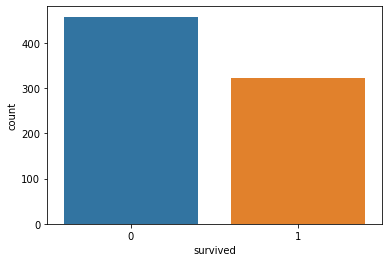

In [14]:
sns.countplot(x='survived',data=df);

In [15]:
df['survived'].value_counts(normalize=True)

0    0.587179
1    0.412821
Name: survived, dtype: float64

Les personnes qui ont survécu sont moins nombreux que les décécées soit 41%

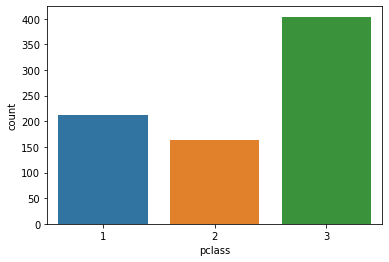

In [16]:
sns.countplot(x='pclass',data=df);

In [17]:
df['pclass'].value_counts(normalize=True)

3    0.517949
1    0.271795
2    0.210256
Name: pclass, dtype: float64

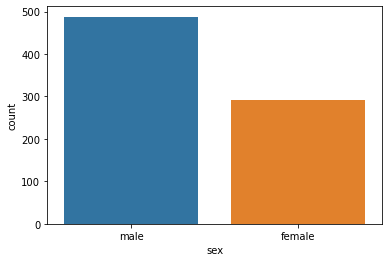

In [18]:
sns.countplot(x='sex',data=df);

In [19]:
df['sex'].value_counts(normalize=True)

male      0.625641
female    0.374359
Name: sex, dtype: float64

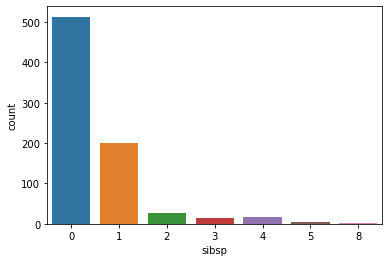

In [20]:
sns.countplot(x='sibsp',data=df);

In [21]:
df['sibsp'].value_counts(normalize=True)

0    0.657692
1    0.257692
2    0.034615
4    0.023077
3    0.017949
5    0.006410
8    0.002564
Name: sibsp, dtype: float64

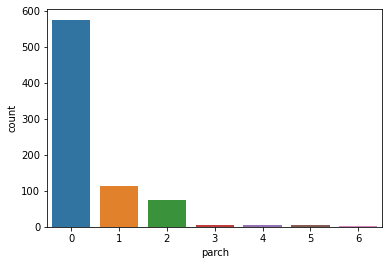

In [22]:
sns.countplot(x='parch',data=df);

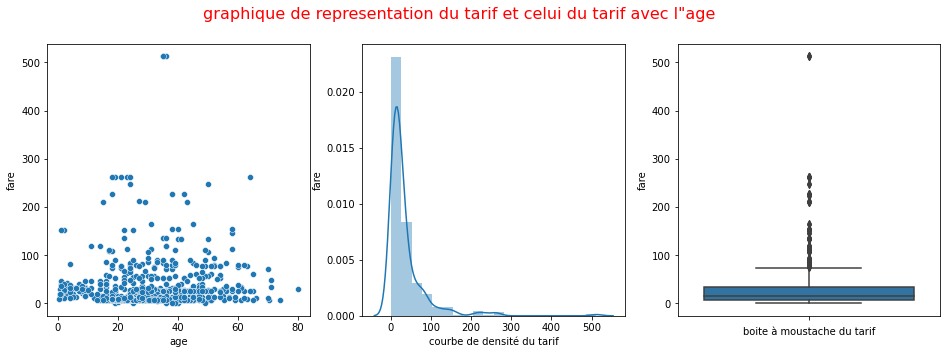

In [23]:
#créer une figure avec 3 Axes sur la même ligne
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.scatterplot(y='fare',x='age', data=df,ax=ax[0])
ax[0].set_xlabel('age')
ax[0].set_ylabel('fare')
sns.distplot(df['fare'], bins=20, kde=True,ax=ax[1])
ax[1].set_xlabel('courbe de densité du tarif')
ax[1].set_ylabel('fare')
sns.boxplot(y='fare',data=df, ax=ax[2])
ax[2].set_xlabel('boite à moustache du tarif')
ax[2].set_ylabel('fare')
#ajouter un texte à une figure
fig.text(0.26, 0.95, 'graphique de representation du tarif et celui du tarif avec l"age', fontsize = 16,color='r');

In [24]:
df['fare'].describe()

count    780.000000
mean      34.829108
std       52.263440
min        0.000000
25%        8.050000
50%       15.950000
75%       34.375000
max      512.329200
Name: fare, dtype: float64

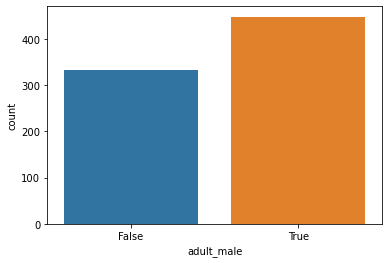

In [25]:
sns.countplot(x='adult_male',data=df);

In [26]:
df['adult_male'].value_counts(normalize=True)

True     0.574359
False    0.425641
Name: adult_male, dtype: float64

In [27]:
pd.crosstab(df['sex'],df['adult_male'])

adult_male,False,True
sex,,
female,292,0
male,40,448


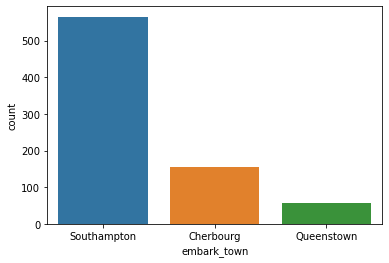

In [28]:
sns.countplot(x='embark_town',data=df);

In [29]:
df['embark_town'].value_counts(normalize=True)

Southampton    0.726221
Cherbourg      0.199229
Queenstown     0.074550
Name: embark_town, dtype: float64

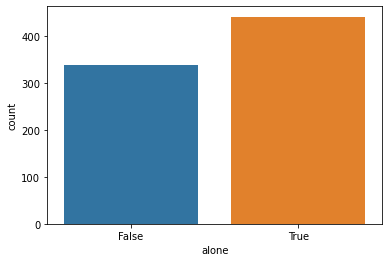

In [30]:
sns.countplot(x='alone',data=df);

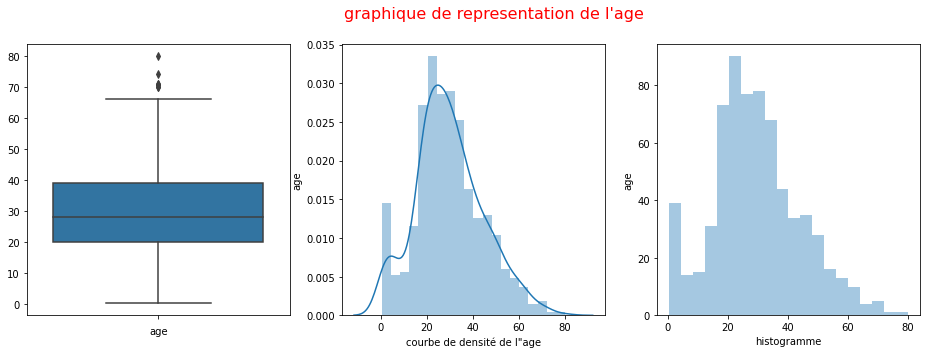

In [31]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

sns.boxplot(y='age',data=df,ax=ax[0])
ax[0].set_xlabel('age')
ax[0].set_ylabel('')

sns.distplot(df['age'], bins=20, kde=True,ax=ax[1])
ax[1].set_xlabel('courbe de densité de l"age')
ax[1].set_ylabel('age')

sns.distplot(df['age'], bins=20, kde=False,ax=ax[2])
ax[2].set_xlabel('histogramme')
ax[2].set_ylabel('age')

fig.text(0.4, 0.95, "graphique de representation de l'age", fontsize = 16,color='r');

In [32]:
df['age'].describe()

count    676.000000
mean      29.812751
std       14.727098
min        0.420000
25%       20.000000
50%       28.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64

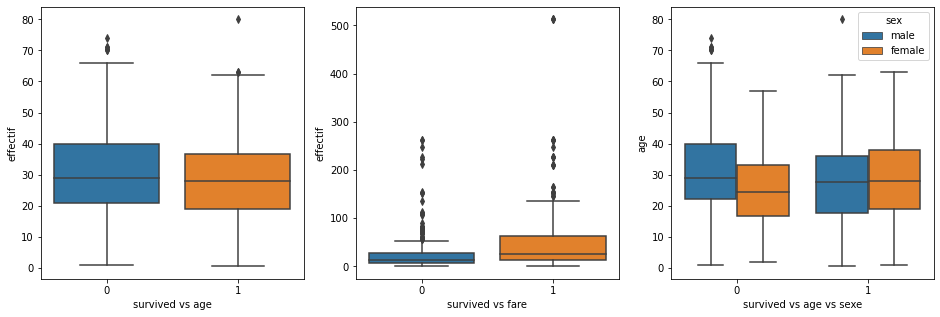

In [33]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

sns.boxplot(x='survived', y='age', data=df,ax=ax[0])
ax[0].set_xlabel('survived vs age')
ax[0].set_ylabel('effectif')

sns.boxplot(x='survived', y='fare', data=df,ax=ax[1])
ax[1].set_xlabel('survived vs fare')
ax[1].set_ylabel('effectif')

sns.boxplot(x='survived', y='age',hue='sex', data=df,ax=ax[2])
ax[2].set_xlabel('survived vs age vs sexe')
ax[2].set_ylabel('age');

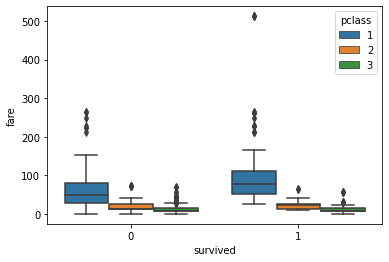

In [34]:
sns.boxplot(x='survived', y='fare',hue='pclass', data=df);

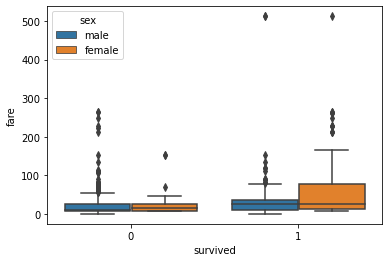

In [35]:
sns.boxplot(x='survived', y='fare',hue='sex', data=df);

       2.Nettoyage des données

  -  gestion des données manquantes

In [36]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            104
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [37]:
(df.isna().sum()/len(df))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.333333
sibsp           0.000000
parch           0.000000
fare            0.000000
adult_male      0.000000
embark_town     0.256410
alone           0.000000
dtype: float64

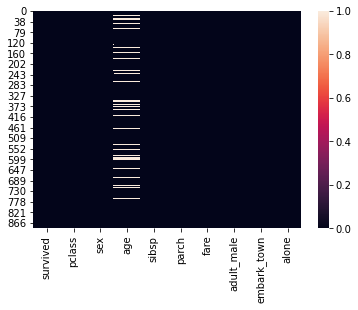

In [38]:
sns.heatmap(df.isna());

In [39]:
df['age'].std()

14.727098232308757

In [40]:
# imputation par la moyenne ou par la mediane pour la variable age

  ###### imputation par la moyenne df.fillna(value={'age':df['age'].mean()}, inplace=True)

df.fillna(value={'age':df['age'].median()}, inplace=True)

In [41]:
df['age'].std()

13.722688798249168

In [42]:
# Imputation de la variable embark_town par le mode 
df.fillna(value={'embark_town':'Southampton'}, inplace=True)

In [43]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

-  gestion des valeurs abérrantes

In [44]:
#Fonction de determination des données abérrantes

def valeur_aberante(dataset,variable):
    quart1=dataset[variable].quantile(0.25)
    quart3=dataset[variable].quantile(0.75)
    iqr=quart3-quart1
    lower=quart1-1.5*iqr
    upper=quart3+1.5*iqr
    return dataset[(dataset[variable]<lower)|(dataset[variable]>upper)]

In [45]:
valeur_aberante(df,'age').sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
11,1,1,female,58.0,0,0,26.5500,False,Southampton,True
659,0,1,male,58.0,0,2,113.2750,True,Cherbourg,False
195,1,1,female,58.0,0,0,146.5208,False,Cherbourg,True
487,0,1,male,58.0,0,0,29.7000,True,Cherbourg,True
268,1,1,female,58.0,0,1,153.4625,False,Southampton,False
94,0,3,male,59.0,0,0,7.2500,True,Southampton,True
232,0,2,male,59.0,0,0,13.5000,True,Southampton,True
694,0,1,male,60.0,0,0,26.5500,True,Southampton,True
684,0,2,male,60.0,1,1,39.0000,True,Southampton,False
587,1,1,male,60.0,1,1,79.2000,True,Cherbourg,False


In [46]:
valeur_aberante(df,'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
366,1,1,female,60.0,1,0,75.2500,False,Cherbourg,False
218,1,1,female,32.0,0,0,76.2917,False,Cherbourg,True
52,1,1,female,49.0,1,0,76.7292,False,Cherbourg,False
645,1,1,male,48.0,1,0,76.7292,True,Cherbourg,False
681,1,1,male,27.0,0,0,76.7292,True,Cherbourg,True
...,...,...,...,...,...,...,...,...,...,...
341,1,1,female,24.0,3,2,263.0000,False,Southampton,False
27,0,1,male,19.0,3,2,263.0000,True,Southampton,False
737,1,1,male,35.0,0,0,512.3292,True,Cherbourg,True
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg,False


In [47]:
valeur_aberante(df,'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
366,1,1,female,60.0,1,0,75.2500,False,Cherbourg,False
218,1,1,female,32.0,0,0,76.2917,False,Cherbourg,True
52,1,1,female,49.0,1,0,76.7292,False,Cherbourg,False
645,1,1,male,48.0,1,0,76.7292,True,Cherbourg,False
681,1,1,male,27.0,0,0,76.7292,True,Cherbourg,True
...,...,...,...,...,...,...,...,...,...,...
341,1,1,female,24.0,3,2,263.0000,False,Southampton,False
27,0,1,male,19.0,3,2,263.0000,True,Southampton,False
737,1,1,male,35.0,0,0,512.3292,True,Cherbourg,True
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg,False


In [48]:
probable_outliers=valeur_aberante(df,'fare').sort_values('fare')

In [49]:
probable_outliers_fare=probable_outliers['fare']

In [50]:
probable_outliers_fare

366     75.2500
218     76.2917
52      76.7292
645     76.7292
681     76.7292
         ...   
341    263.0000
27     263.0000
737    512.3292
679    512.3292
258    512.3292
Name: fare, Length: 97, dtype: float64

#Methode de winsorizing outliers 

In [51]:
#Fonction de determination de la cloture extérieure

def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue


In [52]:
#Pour l'age

outer_fence_le, outer_fence_ue = fences(df, 'age')

In [53]:
print('Lower end outer fence: ', outer_fence_le)

Lower end outer fence:  -21.0


In [54]:
print('Upper end outer fence: ', outer_fence_ue)

Upper end outer fence:  78.75


In [55]:
#Exploration des différents quantiles à l'extrémité supérieure de la variable age
print('90% quantile:   ', df['age'].quantile(0.90))       
print('92.5% quantile: ', df['age'].quantile(0.925))     
print('95% quantile:   ', df['age'].quantile(0.95))       
print('97.5% quantile: ', df['age'].quantile(0.975))      
print('99% quantile:   ', df['age'].quantile(0.99))       
print('99.9% quantile: ', df['age'].quantile(0.999))      

90% quantile:    48.10000000000002
92.5% quantile:  51.0
95% quantile:    55.02499999999998
97.5% quantile:  61.0
99% quantile:    65.21000000000004
99.9% quantile:  75.3260000000007


In [118]:
from scipy.stats.mstats import winsorize

df_win = df.copy(deep=True)

#Winsorize sur la queue droite

df_win['age_99%'] = winsorize(df['age'], limits=(0, 0.01))

df_win.describe()


,survived,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare,age,age_99%
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.00000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,0.625641,0.574359,0.566667,0.074359,0.726923,0.94359,30.138424,29.514000,29.514000
std,0.492657,0.854452,0.484267,0.494757,0.495854,0.262523,0.445826,1.51988,31.367700,13.552931,13.552931
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.420000,0.420000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.050000,21.750000,21.750000
50%,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,15.950000,28.000000,28.000000
75%,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,34.375000,36.000000,36.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.00000,120.000000,66.000000,66.000000


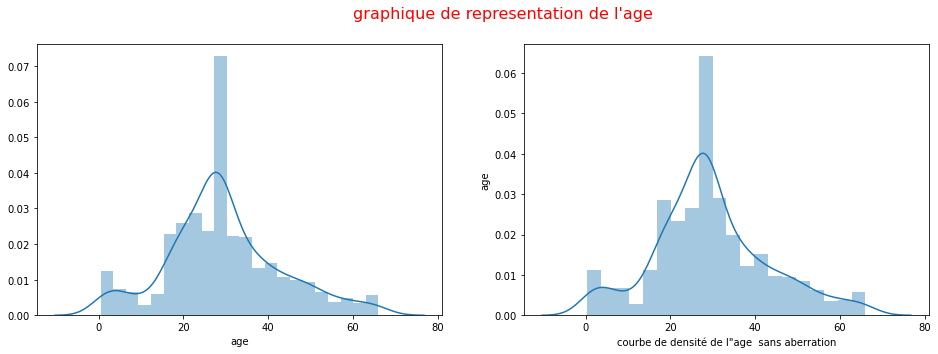

In [116]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.distplot(df['age'],ax=ax[0])
ax[0].set_xlabel('age')
ax[0].set_ylabel('')

sns.distplot(df_win['age_99%'], bins=20, kde=True,ax=ax[1])
ax[1].set_xlabel('courbe de densité de l"age  sans aberration')
ax[1].set_ylabel('age')

fig.text(0.4, 0.95, "graphique de representation de l'age", fontsize = 16,color='r');

<AxesSubplot:xlabel='age'>

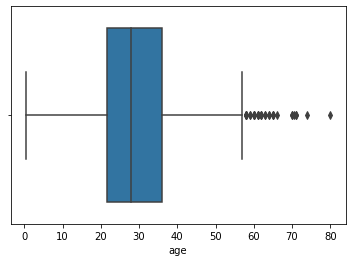

In [114]:
sns.boxplot(df_win['age'])

<AxesSubplot:xlabel='age_99%'>

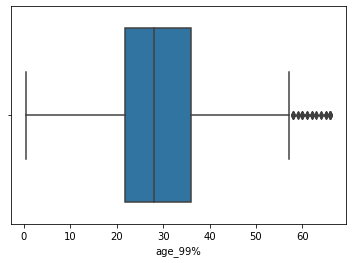

In [113]:
sns.boxplot(df_win['age_99%'])

In [58]:
#Pour la variable tarif "fare"
outer_fence_le, outer_fence_ue = fences(df, 'fare')

In [59]:
print('Lower end outer fence: ', outer_fence_le)

Lower end outer fence:  -70.925


In [60]:
print('Upper end outer fence: ', outer_fence_ue)

Upper end outer fence:  113.35


In [61]:
#Exploration des différents quantiles à l'extrémité supérieure de la variable age
print('90% quantile:   ', df['fare'].quantile(0.90))       
print('92.5% quantile: ', df['fare'].quantile(0.925))     
print('95% quantile:   ', df['fare'].quantile(0.95))       
print('97.5% quantile: ', df['fare'].quantile(0.975))      
print('99% quantile:   ', df['fare'].quantile(0.99))       
print('99.9% quantile: ', df['fare'].quantile(0.999))   

90% quantile:    79.65
92.5% quantile:  90.0
95% quantile:    120.0
97.5% quantile:  189.26386999999897
99% quantile:    262.375
99.9% quantile:  512.3292


In [62]:
#winsorisation au 95ieme percentile
df_win['fare_95%'] = winsorize(df['fare'], limits=(0, 0.05))

df_win.describe()

,survived,pclass,age,sibsp,parch,fare,age_99%,fare_95%
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.571051,0.525641,0.417949,34.829108,29.514000,30.138424
std,0.492657,0.854452,13.722689,0.988046,0.838536,52.263440,13.552931,31.367700
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000,21.750000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.950000,28.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000,36.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,66.000000,120.000000


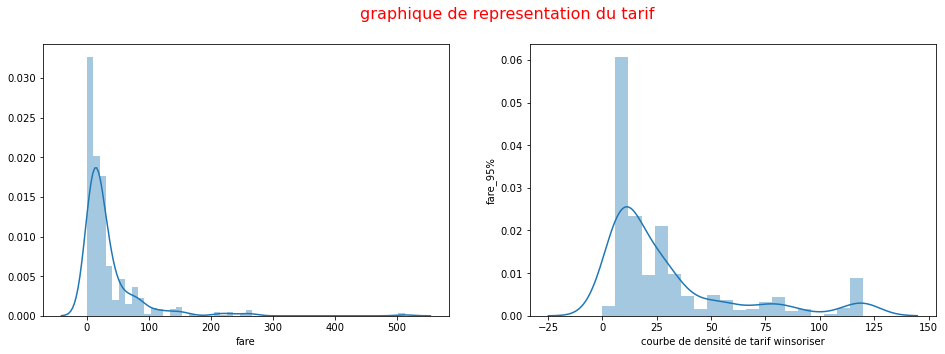

In [63]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.distplot(df['fare'],ax=ax[0])
ax[0].set_xlabel('fare')
ax[0].set_ylabel('')

sns.distplot(df_win['fare_95%'], bins=20, kde=True,ax=ax[1])
ax[1].set_xlabel('courbe de densité de tarif winsoriser')
ax[1].set_ylabel('fare_95%')

fig.text(0.4, 0.95, "graphique de representation du tarif", fontsize = 16,color='r');

****Technique de gestion des données abérrantes par la méthode d'imputation multiple****

In [64]:
# ###Exemple de code 

# #Probable outliers detecté par la méthode de Tukey (example)
# df_imp = df.copy(deep=True)
# probable_outliers_fare = list(probable_outliers_fare)

# #transformer les  outliers en  valeurs manquantes pour  imputation

# def outliers_to_nan(df, variable_name, probable_outliers):
#     for i in probable_outliers_fare:
#         df.at[i, variable_name] = None
#     return df

# df_imp = outliers_to_nan(df_imp, 'fare', probable_outliers_fare)   

# #df_imp[374:378] #test              

In [65]:
# #Define imputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import BayesianRidge

# imputer = IterativeImputer(estimator=BayesianRidge(),
#                            n_nearest_features=None,
#                            imputation_order='ascending')
#                            #, sample_posterior=True)
# #Fit imputer and transform                          
# imputer.fit(df_imp)
# df_imp_tf = imputer.transform(df_imp)
# df_imp = pd.DataFrame(df_imp_tf, columns = df.columns)

# #New mean lowers to 2.36 with random seed at 10
# #
# df_imp.describe()

# #New distribution plot

# sns.distplot(df_imp['fare'])

     3. Préparation des données

 -  Encodage des données catégorielles

In [66]:
df['sex'].replace({'female':0,'male':1},inplace=True)

In [67]:
df['alone']=df['alone'].astype('int')
df['adult_male']=df['adult_male'].astype('int')

In [68]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [69]:
embark_dummies=pd.get_dummies(df['embark_town'],drop_first=True)
embark_dummies

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
887,0,1
888,0,1
889,0,0


In [70]:
df=pd.concat([df,embark_dummies],axis=1)

In [71]:
del df['embark_town']

In [72]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,0,1


In [73]:
df['family']=df['sibsp']+df['parch']

In [74]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,1,0,7.2500,1,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,0,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,1,0,1,0


In [75]:
df.drop(['sibsp','parch'], axis=1, inplace=True)

In [76]:
df.head(3)

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,71.2833,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0


In [77]:
df=pd.concat([df,df_win['fare_95%'],df_win['age_99%']],axis=1)
df

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,fare_95%,age_99%
0,0,3,1,22.0,7.2500,1,0,0,1,1,7.2500,22.0
1,1,1,0,38.0,71.2833,0,0,0,0,1,71.2833,38.0
2,1,3,0,26.0,7.9250,0,1,0,1,0,7.9250,26.0
3,1,1,0,35.0,53.1000,0,0,0,1,1,53.1000,35.0
4,0,3,1,35.0,8.0500,1,1,0,1,0,8.0500,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,0,0,1,0,5,29.1250,39.0
887,1,1,0,19.0,30.0000,0,1,0,1,0,30.0000,19.0
888,0,3,0,28.0,23.4500,0,0,0,1,3,23.4500,28.0
889,1,1,1,26.0,30.0000,1,1,0,0,0,30.0000,26.0


In [78]:
df.drop(['age','fare'],axis=1,inplace=True)
df

,survived,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare_95%,age_99%
0,0,3,1,1,0,0,1,1,7.2500,22.0
1,1,1,0,0,0,0,0,1,71.2833,38.0
2,1,3,0,0,1,0,1,0,7.9250,26.0
3,1,1,0,0,0,0,1,1,53.1000,35.0
4,0,3,1,1,1,0,1,0,8.0500,35.0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,0,0,1,0,5,29.1250,39.0
887,1,1,0,0,1,0,1,0,30.0000,19.0
888,0,3,0,0,0,0,1,3,23.4500,28.0
889,1,1,1,1,1,0,0,0,30.0000,26.0


In [79]:
df=df.rename(columns={'age_99%':'age', 'fare_95%':'fare'})
df.columns

Index(['survived', 'pclass', 'sex', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family', 'fare', 'age'],
      dtype='object')

In [80]:
df

,survived,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare,age
0,0,3,1,1,0,0,1,1,7.2500,22.0
1,1,1,0,0,0,0,0,1,71.2833,38.0
2,1,3,0,0,1,0,1,0,7.9250,26.0
3,1,1,0,0,0,0,1,1,53.1000,35.0
4,0,3,1,1,1,0,1,0,8.0500,35.0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,0,0,1,0,5,29.1250,39.0
887,1,1,0,0,1,0,1,0,30.0000,19.0
888,0,3,0,0,0,0,1,3,23.4500,28.0
889,1,1,1,1,1,0,0,0,30.0000,26.0


In [81]:
#Division des données : 60% entrainment,20% validation et 20% pour test

In [82]:
from sklearn.model_selection import train_test_split 

In [83]:
X=df.drop('survived',axis=1)
y=df['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42,stratify=y_test)

In [84]:
y_train.value_counts(normalize=True)

0    0.587607
1    0.412393
Name: survived, dtype: float64

In [85]:
y_val.value_counts(normalize=True)

0    0.583333
1    0.416667
Name: survived, dtype: float64

In [86]:
y_test.value_counts(normalize=True)

0    0.589744
1    0.410256
Name: survived, dtype: float64

In [87]:
#Réeanchantillonnage surechantillonnnage ou sousechantillonnage


 -   surechantillonnnage 

In [88]:
from sklearn.utils import resample
X2=X_train
X2['survived']=y_train.values

In [89]:
X2.head(3)

,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare,age,survived
15,2,0,0,1,0,1,0,16.0000,55.0,1
108,3,1,1,1,0,1,0,7.8958,38.0,0
124,1,1,1,0,0,1,1,77.2875,54.0,0


In [90]:
minority=X2[X2.survived == 1]
majority=X2[X2.survived == 0]

In [91]:
minority_upsampled = resample(minority, replace=True,n_samples=len(majority))
minority_upsampled

,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare,age,survived
763,1,0,0,0,0,1,3,120.0000,36.0,1
44,3,0,0,1,1,0,0,7.8792,19.0,1
643,3,1,1,1,0,1,0,56.4958,28.0,1
327,2,0,0,1,0,1,0,13.0000,36.0,1
496,1,0,0,0,0,0,1,78.2667,54.0,1
...,...,...,...,...,...,...,...,...,...,...
571,1,0,0,0,0,1,2,51.4792,53.0,1
855,3,0,0,0,0,1,1,9.3500,18.0,1
141,3,0,0,1,0,1,0,7.7500,22.0,1
780,3,0,0,1,0,0,0,7.2292,13.0,1


In [92]:
upsampled = pd.concat([majority,minority_upsampled])
upsampled

,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare,age,survived
108,3,1,1,1,0,1,0,7.8958,38.0,0
124,1,1,1,0,0,1,1,77.2875,54.0,0
176,3,1,1,0,0,1,4,25.4667,28.0,0
112,3,1,1,1,0,1,0,8.0500,22.0,0
728,2,1,1,0,0,1,1,26.0000,25.0,0
...,...,...,...,...,...,...,...,...,...,...
571,1,0,0,0,0,1,2,51.4792,53.0,1
855,3,0,0,0,0,1,1,9.3500,18.0,1
141,3,0,0,1,0,1,0,7.7500,22.0,1
780,3,0,0,1,0,0,0,7.2292,13.0,1


In [93]:
X_train_up=upsampled.drop('survived',axis=1)
y_train_up=upsampled['survived']

In [94]:
#methode de sous échantillonnage
majority_downsampled = resample(majority,replace=False,n_samples=len(minority))
majority_downsampled

,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare,age,survived
152,3,1,1,1,0,1,0,8.0500,55.5,0
130,3,1,1,1,0,0,0,7.8958,33.0,0
180,3,0,0,0,0,1,10,69.5500,28.0,0
719,3,1,1,1,0,1,0,7.7750,33.0,0
175,3,1,1,0,0,1,2,7.8542,18.0,0
...,...,...,...,...,...,...,...,...,...,...
652,3,1,1,1,0,1,0,8.4333,21.0,0
83,1,1,1,1,0,1,0,47.1000,28.0,0
462,1,1,1,1,0,1,0,38.5000,47.0,0
495,3,1,1,1,0,0,0,14.4583,28.0,0


In [95]:
downsampled=pd.concat([minority,majority_downsampled])
downsampled

,pclass,sex,adult_male,alone,Queenstown,Southampton,family,fare,age,survived
15,2,0,0,1,0,1,0,16.0000,55.0,1
400,3,1,1,1,0,1,0,7.9250,39.0,1
804,3,1,1,1,0,1,0,6.9750,27.0,1
518,2,0,0,0,0,1,1,26.0000,36.0,1
233,3,0,0,0,0,1,6,31.3875,5.0,1
...,...,...,...,...,...,...,...,...,...,...
652,3,1,1,1,0,1,0,8.4333,21.0,0
83,1,1,1,1,0,1,0,47.1000,28.0,0
462,1,1,1,1,0,1,0,38.5000,47.0,0
495,3,1,1,1,0,0,0,14.4583,28.0,0


In [96]:
X_train_down =downsampled.drop(['survived'],axis=1)
y_train_down =downsampled['survived']

**4.Modelisation**

In [97]:
#selection des variables importantes

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=0)

rf.fit(X_train_up,y_train_up)

accuracy_score(y_val,rf.predict(X_val))

0.782051282051282

In [98]:
print(X_train_up)
print(rf.feature_importances_)

     pclass  sex  adult_male  alone  Queenstown  Southampton  family     fare  \
108       3    1           1      1           0            1       0   7.8958   
124       1    1           1      0           0            1       1  77.2875   
176       3    1           1      0           0            1       4  25.4667   
112       3    1           1      1           0            1       0   8.0500   
728       2    1           1      0           0            1       1  26.0000   
..      ...  ...         ...    ...         ...          ...     ...      ...   
571       1    0           0      0           0            1       2  51.4792   
855       3    0           0      0           0            1       1   9.3500   
141       3    0           0      1           0            1       0   7.7500   
780       3    0           0      1           0            0       0   7.2292   
866       2    0           0      0           0            0       1  13.8583   

      age  
108  38.0  
124

In [99]:
vars_imp=pd.Series(rf.feature_importances_ , index=X_train_up.columns).sort_values(ascending=False)
vars_imp

fare           0.268439
age            0.257853
adult_male     0.154509
sex            0.147300
pclass         0.066962
family         0.052776
Southampton    0.024279
alone          0.017749
Queenstown     0.010132
dtype: float64

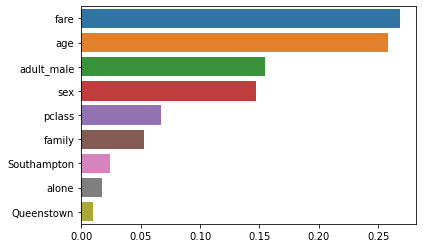

In [100]:
sns.barplot(x=vars_imp,y=vars_imp.index)
plt.show()

In [101]:
vars_non_imp=['Southampton','alone','Queenstown']

X_train_up = X_train_up.drop(vars_non_imp, axis=1)

X_val = X_val.drop(vars_non_imp, axis=1)

X_test=X_test.drop(vars_non_imp, axis=1)

In [102]:
#Regression logistique

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr= LogisticRegression(random_state=0)

lr_hyp_param={'C': [0.001,0.01,0.1, 1.0, 10, 100] }

lr_cv=GridSearchCV(lr, lr_hyp_param, cv = 5)

lr_cv.fit(X_train_up,y_train_up)

print(lr_cv.best_score_)
print(lr_cv.best_estimator_)


0.7781818181818181
LogisticRegression(C=10, random_state=0)


In [103]:
# Foret aleatoire

RF=RandomForestClassifier(random_state=42)

params_RF = {"max_depth": [5,10,20,50,100,200],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2,3,5,7],
           "min_samples_leaf": [1, 3,5,6]}

RF_cv= GridSearchCV(RF, params_RF, cv = 5)

RF_cv.fit(X_train_up,y_train_up)

print(RF_cv.best_score_)

print(RF_cv.best_estimator_)

0.8636363636363636
RandomForestClassifier(max_depth=20, random_state=42)


In [104]:
# SVM
from sklearn.svm import SVC
 
svc=SVC(random_state=42)

svc_params={'C':[0.1,1,10], 'kernel':['linear','rbf','poly']}

svc_cv=GridSearchCV(svc, svc_params , cv = 5)

svc_cv.fit(X_train_up,y_train_up)

print(svc_cv.best_score_)

print(svc_cv.best_estimator_)

0.7909090909090909
SVC(C=0.1, kernel='linear', random_state=42)


In [105]:
#bagging classifier

from sklearn.ensemble import BaggingClassifier

bg=BaggingClassifier(random_state=42)

params_bg = {'n_estimators': [5,10,20,50,100,200]}

bg_cv= GridSearchCV(bg, params_bg, cv = 5)

bg_cv.fit(X_train_up,y_train_up)

print(bg_cv.best_score_)

print(bg_cv.best_estimator_)

0.86
BaggingClassifier(n_estimators=20, random_state=42)


In [106]:
#Evaluation de la performance

def evaluation_model(model,features,labels):
    pred  = model.predict(features)
    score = accuracy_score(y_val,pred)
    print('Score globale du modèle:', round(score,3))

In [107]:
models=[bg_cv.best_estimator_,svc_cv.best_estimator_ ,RF_cv.best_estimator_,lr_cv.best_estimator_]
for model in models:
    print('model ' + str(model))
    evaluation_model(model, X_val, y_val)
    print('-'*90)

model BaggingClassifier(n_estimators=20, random_state=42)
Score globale du modèle: 0.795
------------------------------------------------------------------------------------------
model SVC(C=0.1, kernel='linear', random_state=42)
Score globale du modèle: 0.705
------------------------------------------------------------------------------------------
model RandomForestClassifier(max_depth=20, random_state=42)
Score globale du modèle: 0.795
------------------------------------------------------------------------------------------
model LogisticRegression(C=10, random_state=0)
Score globale du modèle: 0.692
------------------------------------------------------------------------------------------


In [108]:
def courbe_appentissage(model):
    
    model.fit(X_train_up, y_train_up)
    predicted = model.predict(X_val)
      
    acc=accuracy_score(y_val, predicted)
    print('acc: ', acc)
    
    N, train_score, val_score = learning_curve(model, X_train_up, y_train_up,
                                               cv=4,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.title(model, fontsize=24)
    plt.legend()
    print('-'*90)

acc:  0.7948717948717948
------------------------------------------------------------------------------------------
acc:  0.7051282051282052
------------------------------------------------------------------------------------------
acc:  0.7948717948717948
------------------------------------------------------------------------------------------
acc:  0.6923076923076923
------------------------------------------------------------------------------------------


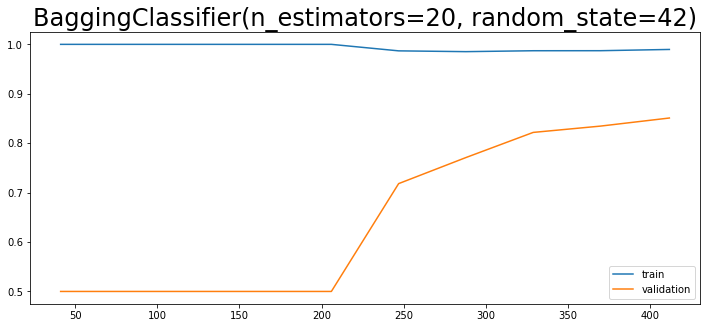

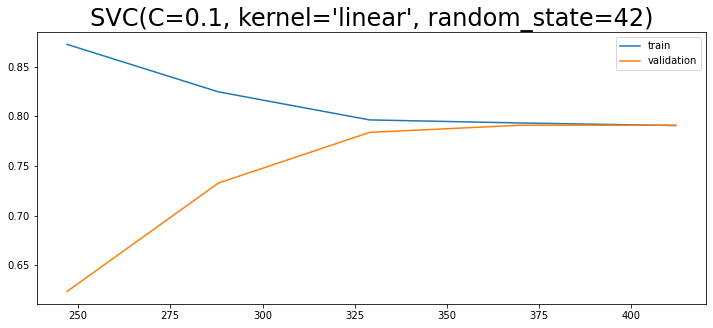

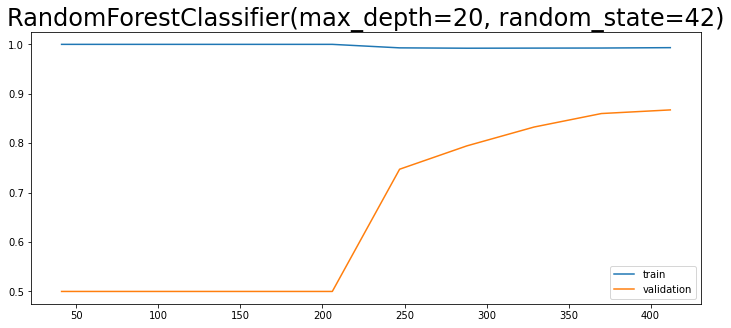

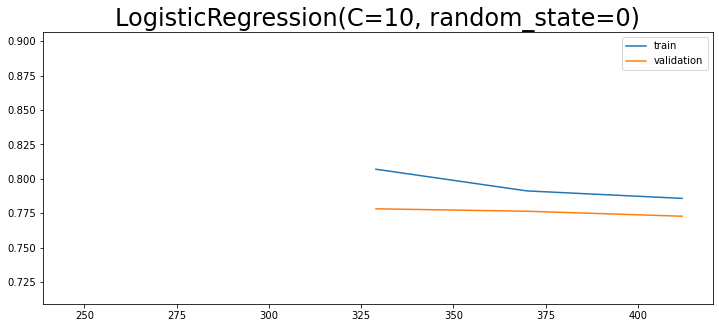

In [109]:
from sklearn.model_selection import learning_curve
for model in models:
    courbe_appentissage(model)

In [110]:
#Performance du meilleur modele sur la donnée de test

accuracy_score(y_test,RF_cv.best_estimator_.predict(X_test))


0.8205128205128205